# New Apprentice Python Project 
**Using the appleAppData data set found on Kaggle! https://www.kaggle.com/datasets/gauthamp10/apple-appstore-apps** 

```python
Business Questions :
1. What is the average rating of the FREE and NON-FREE apps
2. What are the average ratings of common genres (gaming, business, navigation, etc)?
3. What is the average, minimum and max price of gaming apps?
```


##### Importing Libraries, opening the dataset and cleaning it


In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

df = pd.read_csv('appleAppData.csv')
df_main = df.dropna() # Drops all NaN values
df_main = df_main[['Primary_Genre', 'Price', 'Free', 'Average_User_Rating']] # Dropping all but the columns im using in this project

Showing the dataset information and displaying a small table of the data

In [3]:
# Displaying data set information
df_main.info()

# Showing a small table of some of the data I will be analyzing
df_table = df_main[['Primary_Genre', 'Average_User_Rating', 'Free']]
df_table.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585721 entries, 4 to 1230374
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Primary_Genre        585721 non-null  object 
 1   Price                585721 non-null  float64
 2   Free                 585721 non-null  bool   
 3   Average_User_Rating  585721 non-null  float64
dtypes: bool(1), float64(2), object(1)
memory usage: 18.4+ MB


,Primary_Genre,Average_User_Rating,Free
4,Reference,0.00000,True
7,Book,0.00000,True
9,News,0.00000,True
11,Book,4.78902,True
13,Book,3.09524,False
14,Book,3.88333,False
15,Book,4.13253,False
18,Book,3.00000,True
21,Games,5.00000,True
23,Games,0.00000,False


# Creating a function to find the average of free and paid apps!

Creating the app_rating function to itterate through free and paid apps

In [4]:
def app_ratings():
    global free_apps, paid_apps
    free_apps = []
    paid_apps = []

    for index, row in df_main.iterrows():
        if row[3] > 0:
            rating = row[3] 
            free_checker = row[2] # Set a variable to hold the value of the free column from the dataset
            if free_checker == True:
                free_apps.append(rating) # Adds the rating value to the free apps list only the free_checker returns True
            else: 
                paid_apps.append(rating) # Adds the rating value to the paid apps list if free_checker returns False

Creating an average finder function for lists to keep code cleaner. Calling app_ratings function to create a graph of the data found!


[Text(0, 0, '4.124'), Text(0, 0, '3.8252')]

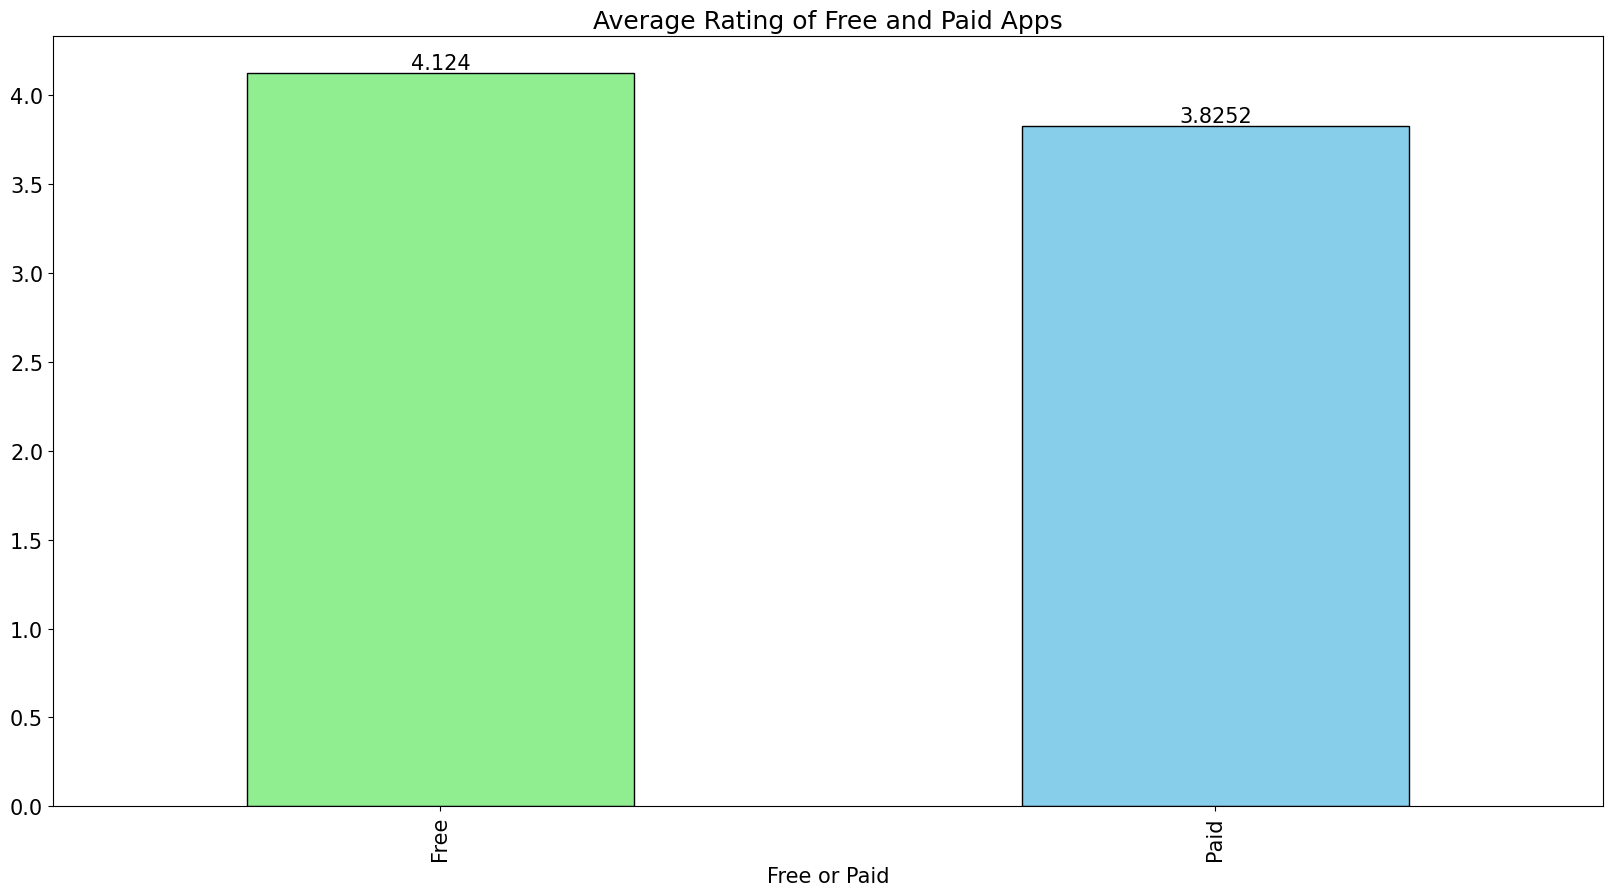

In [6]:
           
# Create a function thats accepts a list and returns the average value of that list 
def average_for_lists(list):
    average = round(sum(list) / len(list), 4)
    return average

# Calling my loop function to find the ratings from free and paid apps
app_ratings() ##Calling my loop function to find the ratings from free and paid apps

# Create a dictionary to hold the found data
free_paid_graph_dict = {'Free or Paid': ['Free', 'Paid'],
                    'Average Rating':[average_for_lists(free_apps), average_for_lists(paid_apps)]}

# Turning that dictionary into a dataframe to later graph
free_paid_df = pd.DataFrame(free_paid_graph_dict)

# Graphing the dataframe
matplotlib.style.use('default')
matplotlib.rcParams['font.size'] = 15
free_paid_graph = free_paid_df.plot(figsize = (20, 10),
            color = ['lightgreen', 'skyblue'],
            kind = 'bar',
            legend = False,
            x = 'Free or Paid',
            y = 'Average Rating',
            title = 'Average Rating of Free and Paid Apps',
            edgecolor = 'black')
free_paid_graph.bar_label(free_paid_graph.containers[0]) #shows the value of the bars

# Finding the average rating of user defined genres

Create a function to take 3 genres and return the ratings in a list

In [7]:
def genre_ratings(g1, g2, g3):
    # Set these as global variables because I use them later in a different cell
    global genre1_list, genre2_list, genre3_list, inp1, inp2, inp3 

    # Saving function parameters as user inputs to use in graph
    inp1 = g1
    inp2 = g2
    inp3 = g3

    # Create genre lists to hold the ratings of specified genres
    genre1_list = []
    genre2_list = []
    genre3_list = []

    # itterate over the rows and check for if the primary genre has a value of the user inputed value and adding that rating to the designated list
    for index, row in df_main.iterrows():
        rating = row[3]
        genre_checker = row['Primary_Genre']
        if genre_checker == g1 and row[3] > 0.0:
            genre1_list.append(rating)
        elif genre_checker == g2 and row[3] > 0.0:
            genre2_list.append(rating)
        elif genre_checker == g3 and row[3] > 0.0:
            genre3_list.append(rating)

Call the function with three genres and graph the data

[Text(0, 0, '4.1385'), Text(0, 0, '3.8129'), Text(0, 0, '4.0926')]

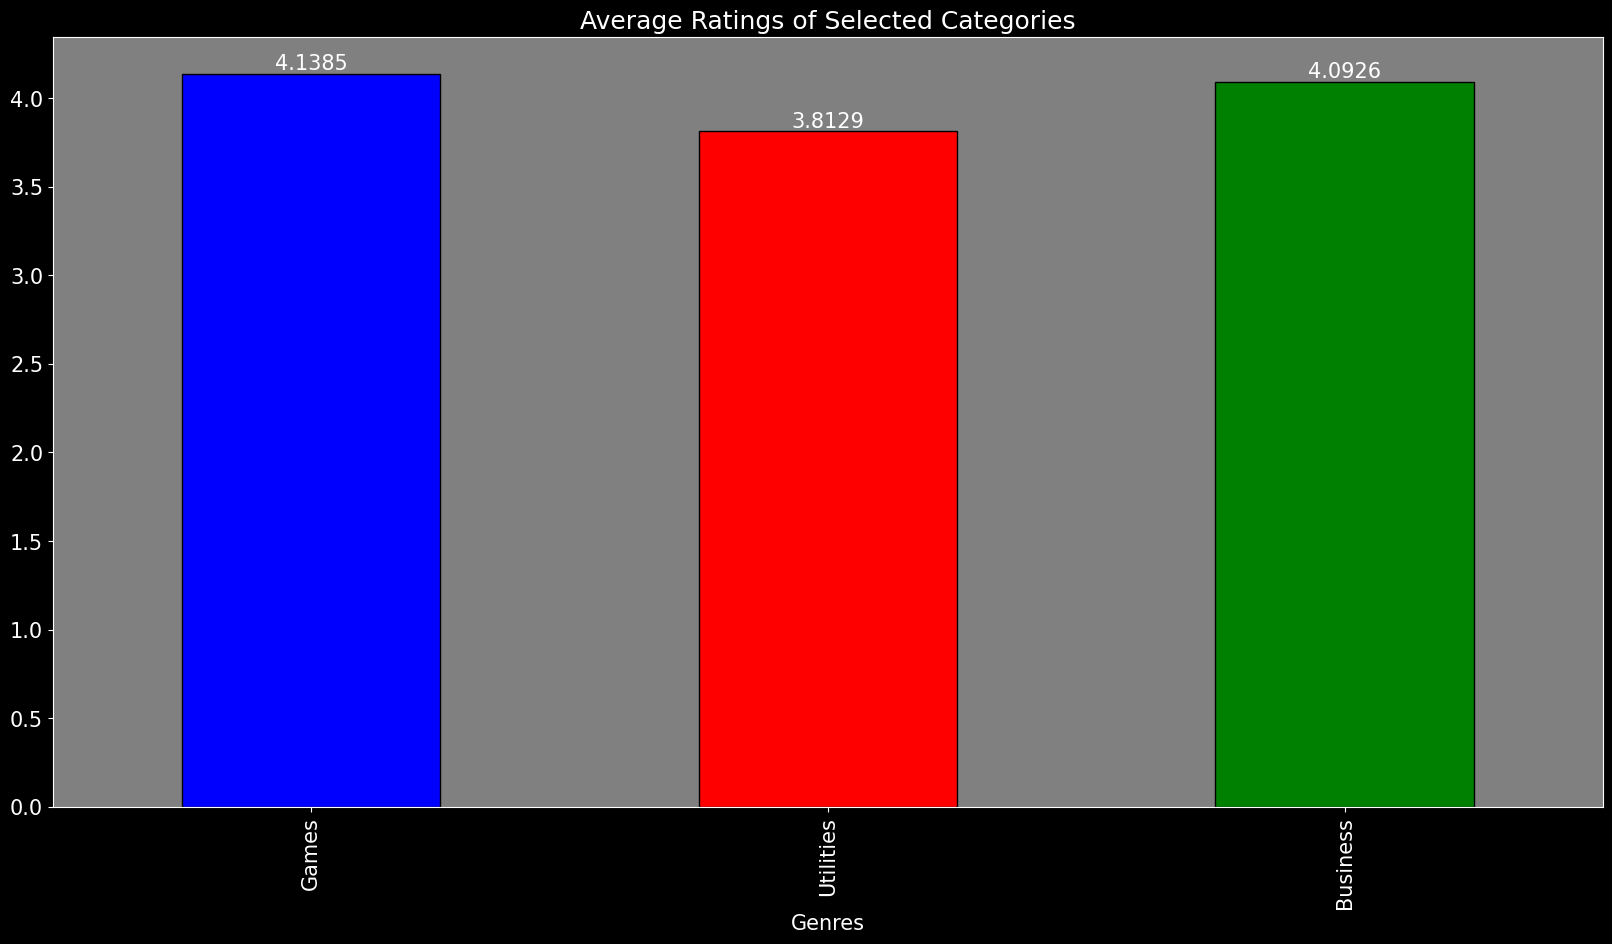

In [8]:
# Call my funciton with 3 genres (you can put any genre thats in the data set)
genre_ratings('Games', 'Utilities', 'Business')


genre_dic = {'Genres': [inp1, inp2, inp3],
                'Average Ratings':[average_for_lists(genre1_list), average_for_lists(genre2_list), average_for_lists(genre3_list)]}

genre_df = pd.DataFrame(genre_dic)
matplotlib.style.use('dark_background')
matplotlib.rcParams['font.size'] = 15
## Creates a bar graph using the information from the DataFrame
genre_graph = genre_df.plot(figsize = (20, 10), 
            kind = 'bar',
            title = 'Average Ratings of Selected Categories',
            legend = False,
            x = 'Genres',
            y = 'Average Ratings',
            color = ['blue', 'red', 'green'],
            edgecolor = 'black')
genre_graph.set_facecolor('gray')
genre_graph.bar_label(genre_graph.containers[0]) #Graph labels to display the actual average of the genre

# Calculating the average price of gaming apps

In [87]:
price_gaming_apps = []

for row in apps_data[1:]:
    genre = row[3]
    try:
        if float(row[10]) > 0 and genre == 'Games':
            price_gaming_apps.append(float(row[10]))
    except ValueError:
        pass

    
avg_paid_apps = round(sum(price_gaming_apps) / len(price_gaming_apps), 2)
most_expensive_game_app = max(price_gaming_apps)
cheapest_game_app = min(price_gaming_apps)


print("The average price of gaming apps is: " + "$" + str(avg_paid_apps))
print("The most expensive gaming app is: " + "$" + str(most_expensive_game_app))
print("The cheapest gaming app is: " + "$" + str(cheapest_game_app))


## Maybe make a graph showing the max, min and avg price?? I dunno yet

The average price of gaming apps is: $3.37
The most expensive gaming app is: $174.99
The cheapest gaming app is: $0.99
